# Supervised Machine Learning: k-Nearest Neighbors and Gower's Distance

This lecture covers two main topics:

1. **k-Nearest Neighbors (kNN)** classification, focusing on:
   - Mathematical theory of distance-based classification
   - Common distance metrics (Euclidean, Manhattan, Minkowski)
   - Parameter selection and problem-solving approach
   - Python examples using scikit-learn

2. **Gower's Distance**:
   - Explanation of Gower's distance and how it handles mixed data (numerical, categorical)
   - Mathematical formulation of Gower's distance
   - A Python example showing how to compute Gower distances

We will start with a theoretical overview of kNN and distance metrics, then proceed to code examples. Afterwards, we will discuss Gower's distance in detail and implement a simple example. Let's begin!

## 1. k-Nearest Neighbors: Mathematical Foundations

The **k-Nearest Neighbors (kNN)** algorithm is a supervised learning method used for both classification and regression. Here, we will focus on **classification**.

### 1.1 Basic Idea
1. We have a labeled training set $(x_i, y_i)$ for $i=1..z$, where $x_i$ is a feature vector and y_i is its class label.
2. For a new point $x_{new}$, we compute distances to all training points.
3. We pick the **k** closest neighbors based on our distance metric.
4. We classify $x_{new}$ by majority vote (for classification), or averaging (for regression).

### 1.2 Distance Metrics
Common distance metrics in kNN include:

- **Euclidean Distance**: for points $x = (x_1, x_2, ..., x_n)$ and $y = (y_1, y_2, ..., y_n)$,
  
  $d_{eucl}(x, y) = sqrt( sum_{j=1}^n (x_j - y_j)^2 )$.

- **Manhattan Distance** (L1 distance):
  
  $d_{man}(x, y) = sum_{j=1}^n |x_j - y_j|$.

- **Minkowski Distance** (general form):
  
  $d_p(x, y) = ( sum_{j=1}^n |x_j - y_j|^p )^{(1/p)}$.
  
  - Euclidean = Minkowski with p=2
  - Manhattan = Minkowski with p=1

### 1.3 Choosing k
- A small k can lead to **overfitting**, capturing noise.
- A large k can lead to **underfitting**, ignoring local structure.
- We often pick k via cross-validation or domain heuristics.

### 1.4 Algorithm Steps (Classification)
1. Compute distances from x_new to each training sample.
2. Sort training samples by distance.
3. Select top k neighbors.
4. Vote among neighbors' labels.
5. Assign the majority label to x_new.

In [ ]:
# Quick Demo: A manual small example of kNN distance calculation.
import numpy as np

# Suppose we have 3 training samples in 2D:
X_train = np.array([[3, 2],  # label 0
                    [3, 3],  # label 1
                    [3, 2]]) # label 0
y_train = np.array([0, 1, 0])

# New point
x_new = np.array([2.5, 2])

# Let's compute Euclidean distances manually:
distances = []
for i, x in enumerate(X_train):
    dist = np.sqrt(np.sum((x_new - x)**2))
    distances.append((dist, y_train[i]))

# Sort by distance
distances.sort(key=lambda tup: tup[0])
print("Distances (Eucl.) sorted:", distances)

# If we pick k=2, we get the first two neighbors:
k = 2
neighbors = distances[:k]
print("\nNearest 2 neighbors:", neighbors)
labels = [label for (d, label) in neighbors]
pred_label = max(set(labels), key=labels.count)
print("\nPredicted label with k=2:", pred_label)

Distances (Eucl.) sorted: [(0.5, 0), (0.5, 0), (1.118033988749895, 1)]

Nearest 2 neighbors: [(0.5, 0), (0.5, 0)]

Predicted label with k=2: 0


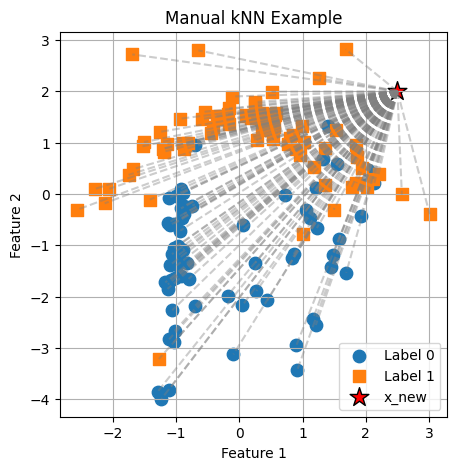

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# REUSE X_train, y_train, x_new from the example above
# Assume X_train is shape (3,2), y_train has labels in {0,1} for demonstration.

def plot_manual_knn_example(X_train, y_train, x_new):
    """
    Plots the training points in 2D, color-coded by label,
    and the new point x_new in a distinct style.
    Draws lines from x_new to each point (optional).
    """
    plt.figure(figsize=(5, 5))

    # Separate the training points by label for coloring
    label0 = (y_train == 0)
    label1 = (y_train == 1)

    plt.scatter(X_train[label0, 0], X_train[label0, 1],
                label="Label 0", marker='o', s=80)
    plt.scatter(X_train[label1, 0], X_train[label1, 1],
                label="Label 1", marker='s', s=80)

    # Plot the new point
    plt.scatter(x_new[0], x_new[1],
                label="x_new",
                marker='*', s=200, color='red', edgecolors='black')

    # OPTIONAL: Draw lines from x_new to each point to visualize distances
    for i in range(len(X_train)):
        plt.plot([x_new[0], X_train[i, 0]],
                 [x_new[1], X_train[i, 1]],
                 color='gray', linestyle='--', alpha=0.4)

    plt.title("Manual kNN Example")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function
plot_manual_knn_example(X_train, y_train, x_new)


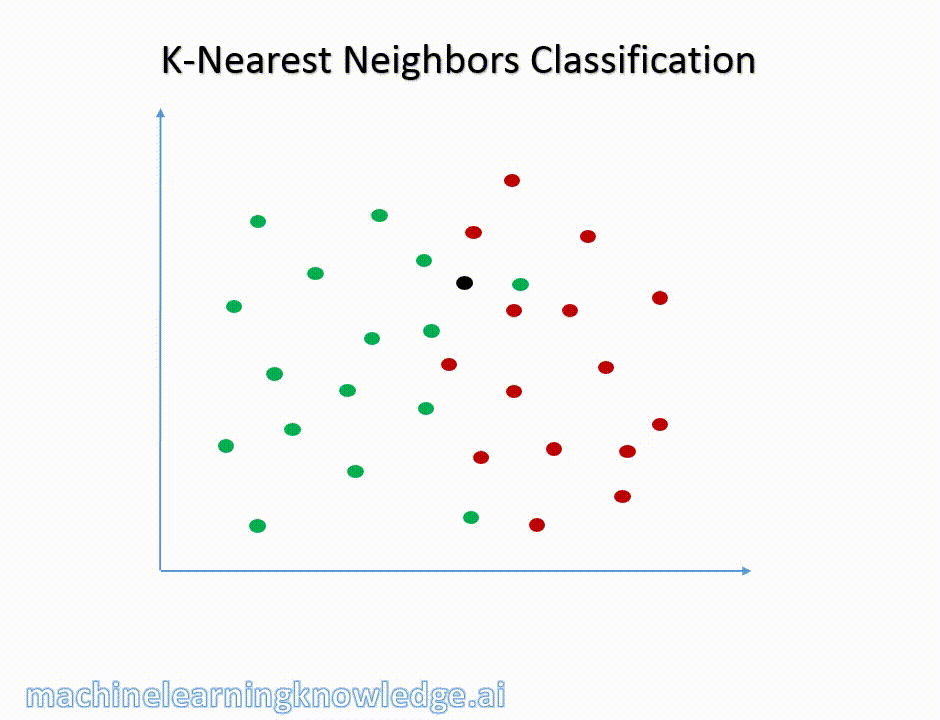

## 2. Python Example with kNN (scikit-learn)

We will use `sklearn.neighbors.KNeighborsClassifier` on a small synthetic dataset. We will also show how to pick different distance metrics by specifying p (for Minkowski) or using a custom metric.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Create a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, random_state=1)

# 2. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# 3. Build kNN with k=3 (p=2 -> Euclidean)
knn = KNeighborsClassifier(n_neighbors=3, p=1)
knn.fit(X_train, y_train)

# 4. Predict
y_pred = knn.predict(X_test)

# 5. Evaluate
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")
print("Confusion Matrix:\n", cm)

Accuracy: 0.85
Confusion Matrix:
 [[130  20]
 [ 25 125]]


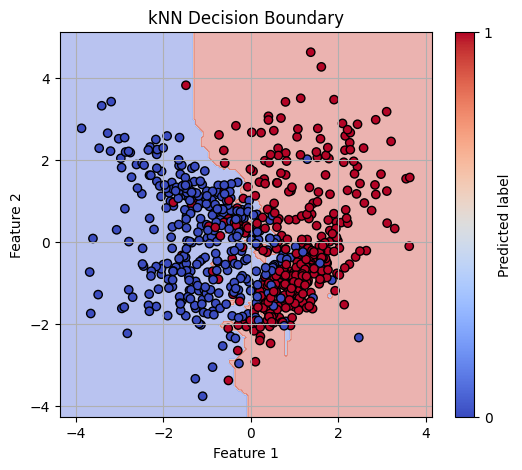

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_knn_decision_boundary(knn_model, X_train, y_train):
    """
    Plots a 2D decision boundary for a trained kNN model,
    and shows the training points color-coded by their label.
    """
    # Determine bounds of the plot
    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5

    # Create a mesh grid
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Predict on the whole grid
    Z = knn_model.predict(grid_points)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')

    # Plot training points
    plt.scatter(X_train[:, 0], X_train[:, 1],
                c=y_train, cmap='coolwarm', edgecolor='k')

    plt.title("kNN Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar(label="Predicted label", ticks=[0, 1])
    plt.grid(True)
    plt.show()


plot_knn_decision_boundary(knn, X_train, y_train)


### 2.1 Trying Different k or Distance Metrics
We can vary `n_neighbors` or `p` in Minkowski, or even pass a custom distance function. Let's do a quick loop over different k values.

In [ ]:
k_values = [1, 3, 5, 7, 50, 100]
accuracies = []
for k in k_values:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train, y_train)
    y_pred_k = knn_k.predict(X_test)
    score_k = accuracy_score(y_test, y_pred_k)
    accuracies.append(score_k)
    print(f"k={k}, Accuracy={score_k:.2f}")

k=1, Accuracy=0.83
k=3, Accuracy=0.86
k=5, Accuracy=0.86
k=7, Accuracy=0.87
k=50, Accuracy=0.86
k=100, Accuracy=0.86


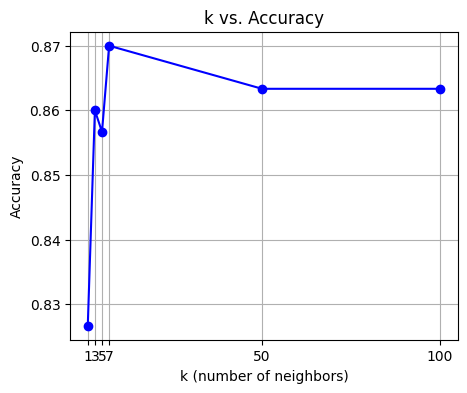

In [ ]:
import matplotlib.pyplot as plt

def plot_k_vs_accuracy(k_values, accuracies):
    """
    Plots a line chart of k-values vs. accuracy.
    k_values: list of k
    accuracies: corresponding list of accuracy scores
    """
    plt.figure(figsize=(5, 4))
    plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
    plt.title("k vs. Accuracy")
    plt.xlabel("k (number of neighbors)")
    plt.ylabel("Accuracy")
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()


plot_k_vs_accuracy(k_values, accuracies)


## 3. Gower's Distance

**Gower's distance** is a similarity/distance measure that can handle **mixed data** (numerical, categorical, ordinal). It was introduced by J. C. Gower in 1971.

### 3.1 Mathematical Formulation
For two observations a,b each with d features, Gower's similarity coefficient S(x,y) is computed as an average of partial similarities per feature.

If feature j is **numeric**, the partial similarity is:

    s_j(x,y) = 1 - (|x_j - y_j| / range_j)

where range_j = max_j - min_j over all samples.

If feature j is **categorical**, the partial similarity is:

    s_j(x,y) = 1 if x_j = y_j, else 0.

Then, Gower's overall similarity is:

    S(x,y) = (1/d) * sum_{j=1}^d s_j(x,y).

Finally, **Gower's distance** is:

    D_gower(x,y) = 1 - S(x,y).

### 3.2 Why Use Gower's Distance?
- Can handle a mix of numerical and categorical data.
- Each feature is normalized or compared in a feature-appropriate manner.
- Useful in clustering or nearest-neighbor classification when data is not purely numeric.

In [ ]:
# We'll implement a simple function to compute pairwise Gower distances for a small dataset.
# For demonstration, let's handle numeric and categorical features.
import pandas as pd

def gower_distance_matrix(df):
    """
    Compute the Gower distance matrix for a pandas DataFrame.
    We'll assume:
    - Numeric columns -> min/max for scaling.
    - Categorical columns -> 1 if match, 0 if different.
    """
    n = len(df)
    dist_matrix = np.zeros((n, n))

    # Separate numeric and categorical cols
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    cat_cols = df.select_dtypes(exclude=[np.number]).columns

    # Compute min/max for numeric columns to scale
    min_vals = df[numeric_cols].min()
    max_vals = df[numeric_cols].max()
    range_vals = max_vals - min_vals

    for i in range(n):
        for j in range(i+1, n):
            sim_sum = 0.0
            # For each numeric col
            for col in numeric_cols:
                if range_vals[col] == 0:
                    # Avoid division by zero if constant col
                    sim_sum += 1.0  # effectively the same
                else:
                    diff = abs(df.loc[i, col] - df.loc[j, col])
                    sim_sum += 1 - diff / range_vals[col]

            # For each categorical col
            for col in cat_cols:
                sim_sum += 1 if df.loc[i, col] == df.loc[j, col] else 0

            # Average by total number of features
            total_features = len(numeric_cols) + len(cat_cols)
            S_ij = sim_sum / total_features

            # Gower distance is 1 - similarity
            d_ij = 1 - S_ij
            dist_matrix[i, j] = d_ij
            dist_matrix[j, i] = d_ij

    return dist_matrix

# Let's create a small DataFrame with numeric + categorical features.
df_example = pd.DataFrame({
    'Age': [25, 25, 40, 40],
    'Income': [50000, 60000, 50000, 70000],
    'Gender': ['M', 'M', 'F', 'F']
})

gower_dist = gower_distance_matrix(df_example)
print("DataFrame:\n", df_example)
print("\nGower Distance Matrix:\n", gower_dist.round(3))

DataFrame:
    Age  Income Gender
0   25   50000      M
1   25   60000      M
2   40   50000      F
3   40   70000      F

Gower Distance Matrix:
 [[0.    0.167 0.667 1.   ]
 [0.167 0.    0.833 0.833]
 [0.667 0.833 0.    0.333]
 [1.    0.833 0.333 0.   ]]


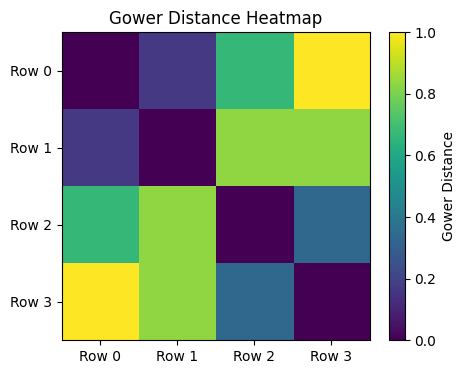

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_gower_heatmap(dist_matrix, df):
    """
    Creates a heatmap for the Gower distance matrix.
    dist_matrix: 2D numpy array of shape (n, n)
    df: the DataFrame from which dist_matrix was computed
    """
    plt.figure(figsize=(5, 4))
    plt.imshow(dist_matrix, interpolation='nearest', cmap='viridis')
    plt.colorbar(label="Gower Distance")

    # Label the axes with row indices or other identifiers
    n = len(df)
    ticks = range(n)
    plt.xticks(ticks, [f"Row {i}" for i in ticks])
    plt.yticks(ticks, [f"Row {i}" for i in ticks])

    plt.title("Gower Distance Heatmap")
    plt.show()


plot_gower_heatmap(gower_dist, df_example)


### Using Gower in kNN
kNN requires a distance metric. If we want to use Gower's distance, we can do something like:
1. Compute the Gower distance matrix between training samples.
2. For a new sample, compute Gower distance to each training point.
3. Then do the usual kNN steps.

Scikit-learn does not provide Gower's distance natively, so we typically implement it ourselves or use specialized libraries. The logic remains the same as standard kNN, just swapping in a different distance measure.

In [ ]:
# Example: Minimal demonstration of kNN + Gower distance manually.
# We'll do a small dataset for classification, mixing numeric/categorical.

df_knn = pd.DataFrame({
    'Feature1': [1, 2, 2, 1],
    'Feature2': ['A', 'A', 'B', 'B'],
    'Label': [0, 0, 1, 1]
})

X_df = df_knn.drop('Label', axis=1)
y_df = df_knn['Label']

# Suppose our new point is (Feature1=1.5, Feature2='A').
x_new_df = pd.DataFrame({
    'Feature1': [1.5],
    'Feature2': ['A']
})

print("Training Data:\n", df_knn)
print("\nNew point:\n", x_new_df)

# We'll compute Gower distances from x_new_df to each row in df_knn.
# Then pick k=3 neighbors.

df_combined = pd.concat([x_new_df, df_knn.drop('Label', axis=1)], ignore_index=True)
dist_matrix = gower_distance_matrix(df_combined)

dist_to_new = dist_matrix[0, 1:]  # distances from new point (row 0) to each training row (1..end)
print("\nDistances from x_new to training samples (Gower):", dist_to_new)

# Let's pick k=3 neighbors.
idx_sorted = np.argsort(dist_to_new)
k = 3
neighbors_idx = idx_sorted[:k]
print("\nIndices of nearest neighbors:", neighbors_idx)
neighbor_labels = y_df.iloc[neighbors_idx].values
print("Neighbor labels:", neighbor_labels)

# Majority vote
pred_label = max(set(neighbor_labels), key=list(neighbor_labels).count)
print("\nPredicted Label:", pred_label)

Training Data:
    Feature1 Feature2  Label
0         1        A      0
1         2        A      0
2         2        B      1
3         1        B      1

New point:
    Feature1 Feature2
0       1.5        A

Distances from x_new to training samples (Gower): [0.25 0.25 0.75 0.75]

Indices of nearest neighbors: [0 1 2]
Neighbor labels: [0 0 1]

Predicted Label: 0


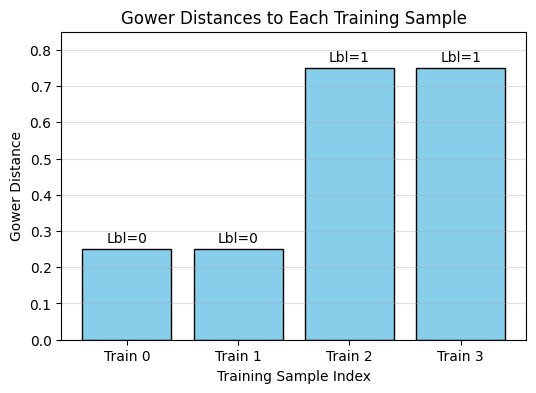

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_gower_knn_barchart(dist_to_new, df_knn):
    """
    Plots a bar chart of Gower distances from x_new to each training sample.
    dist_to_new: 1D array of distances from the new point to df_knn rows
    df_knn: the DataFrame with a 'Label' column
    """
    n = len(dist_to_new)
    labels = df_knn['Label'].values  # training labels
    x_positions = np.arange(n)

    plt.figure(figsize=(6, 4))
    bars = plt.bar(x_positions, dist_to_new, color='skyblue', edgecolor='black')

    # Annotate each bar with label
    for i, bar in enumerate(bars):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                 f"Lbl={labels[i]}", ha='center', va='bottom')

    plt.title("Gower Distances to Each Training Sample")
    plt.xlabel("Training Sample Index")
    plt.ylabel("Gower Distance")
    plt.xticks(x_positions, [f"Train {i}" for i in x_positions])
    plt.ylim([0, dist_to_new.max() + 0.1])
    plt.grid(axis='y', alpha=0.4)
    plt.show()


plot_gower_knn_barchart(dist_to_new, df_knn)


In [ ]:
!pip install gower

Fetching the Adult dataset from OpenML...
Subset shape: (3000, 8)
   age  hours-per-week workclass  education      marital-status  \
0   56              40   Private    HS-grad            Divorced   
1   25              40   Private    HS-grad  Married-civ-spouse   
2   43              40   Private  Bachelors            Divorced   
3   32              40   Private    HS-grad  Married-civ-spouse   
4   39              30   Private  Bachelors  Married-civ-spouse   

         occupation     sex income  
0     Other-service  Female      0  
1  Transport-moving    Male      0  
2    Prof-specialty  Female      1  
3  Transport-moving    Male      0  
4             Sales  Female      0  
Train size: 2100, Test size: 900
Computing Gower distance for the entire set (3k rows total) ...
Gower-kNN (k=5) Accuracy on 3k-sample: 0.837
Confusion Matrix:
[[609  72]
 [ 75 144]]
Classification Report:
              precision    recall  f1-score   support

           0      0.890     0.894     0.892     

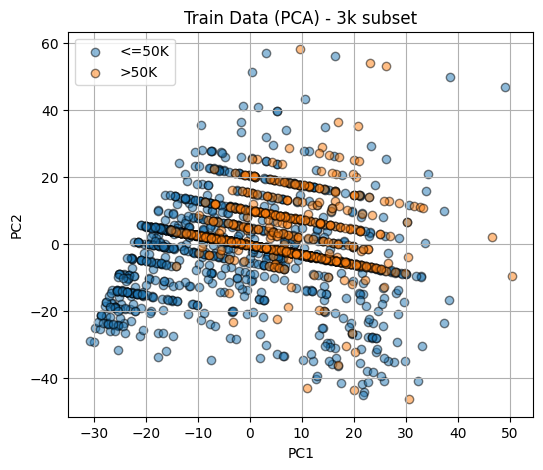

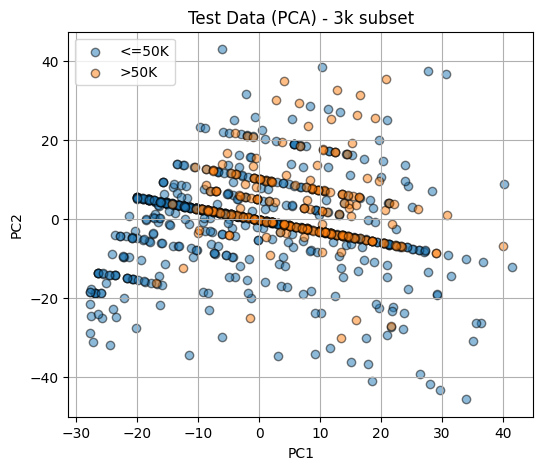

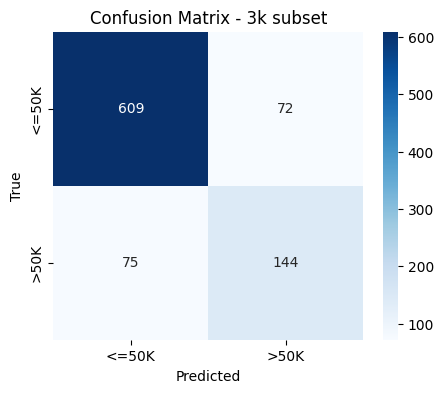

[k=3, weights=uniform] Accuracy = 0.801
[k=3, weights=distance] Accuracy = 0.802
[k=5, weights=uniform] Accuracy = 0.837
[k=5, weights=distance] Accuracy = 0.817
[k=7, weights=uniform] Accuracy = 0.837
[k=7, weights=distance] Accuracy = 0.822


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

import gower

###############################################################################
# 1. Fetch the Adult dataset (OpenML) but only keep 3,000 rows
###############################################################################
print("Fetching the Adult dataset from OpenML...")
adult = fetch_openml("adult", version=2, as_frame=True)
df = adult.frame

# Drop rows with '?' in any column
for col in df.columns:
    if df[col].dtype == object:
        df = df[df[col] != '?']
df.reset_index(drop=True, inplace=True)

# The dataset is still large. Let's sample 3,000 rows
df = df.sample(n=3000, random_state=42).reset_index(drop=True)

# Rename target column
df.rename(columns={"class": "income"}, inplace=True)

###############################################################################
# 2. Subset columns (both numeric and categorical) + target
###############################################################################
use_cols = [
    "age",
    "hours-per-week",
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "sex",
    "income"
]
df = df[use_cols].copy().reset_index(drop=True)

# Convert target to binary (0/1)
df["income"] = df["income"].apply(lambda x: 1 if x.strip() == ">50K" else 0)

# Print shape and some info
print(f"Subset shape: {df.shape}")
print(df.head())

###############################################################################
# 3. Split into train/test (70%/30%)
###############################################################################
X = df.drop("income", axis=1)
y = df["income"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

###############################################################################
# 4. Convert categorical columns to strings for gower
###############################################################################
cat_cols = X_train.select_dtypes(exclude=[np.number]).columns
for c in cat_cols:
    X_train[c] = X_train[c].astype(str)
    X_test[c]  = X_test[c].astype(str)

###############################################################################
# 5. Combine train/test for Gower distance: full dataframe -> distance matrix
###############################################################################
X_full = pd.concat([X_train, X_test], axis=0, ignore_index=True)
n_train = len(X_train)
n_test  = len(X_test)
n_full  = n_train + n_test

train_idx = range(n_train)
test_idx  = range(n_train, n_full)

print("Computing Gower distance for the entire set (3k rows total) ...")
dist_full = gower.gower_matrix(X_full)

# submatrices
dist_train_train = dist_full[np.ix_(train_idx, train_idx)]
dist_test_train  = dist_full[np.ix_(test_idx, train_idx)]

###############################################################################
# 6. k-Nearest Neighbors with metric='precomputed'
###############################################################################
knn_gower = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    algorithm='brute',
    metric='precomputed'
)

# Fit on train portion
knn_gower.fit(dist_train_train, y_train)

# Predict on test portion
y_pred = knn_gower.predict(dist_test_train)

acc = accuracy_score(y_test, y_pred)
print(f"Gower-kNN (k=5) Accuracy on 3k-sample: {acc:.3f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(y_test, y_pred, digits=3))

###############################################################################
# 7. Visualization 1: 2D PCA Plot
#    We do a quick PCA on numeric-coded columns to get a rough 2D representation.
###############################################################################
X_for_pca = X_full.copy()

# Convert all columns to numeric codes for PCA only
cat_cols_pca = X_for_pca.select_dtypes(exclude=[np.number]).columns
for c in cat_cols_pca:
    X_for_pca[c] = X_for_pca[c].astype("category").cat.codes

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_for_pca)

X_pca_train = X_pca[:n_train]
X_pca_test  = X_pca[n_train:]
y_full = np.concatenate([y_train, y_test])

def plot_2d_pca_data(X_2d, y_data, title):
    plt.figure(figsize=(6,5))
    plt.scatter(X_2d[y_data == 0, 0], X_2d[y_data == 0, 1],
                label="<=50K", alpha=0.5, edgecolor='k')
    plt.scatter(X_2d[y_data == 1, 0], X_2d[y_data == 1, 1],
                label=">50K", alpha=0.5, edgecolor='k')
    plt.title(title)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_2d_pca_data(X_pca_train, y_train, "Train Data (PCA) - 3k subset")
plot_2d_pca_data(X_pca_test,  y_test,  "Test Data (PCA) - 3k subset")

###############################################################################
# 8. Visualization 2: Confusion Matrix Heatmap
###############################################################################
def plot_confusion_matrix_heatmap(cm, class_labels=["<=50K", ">50K"]):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix - 3k subset")
    plt.show()

plot_confusion_matrix_heatmap(cm)

###############################################################################
# 9. (Optional) Explore additional hyperparameters
###############################################################################
for k_val in [3,5,7]:
    for w in ["uniform", "distance"]:
        knn_test = KNeighborsClassifier(
            n_neighbors=k_val,
            weights=w,
            algorithm='brute',
            metric='precomputed'
        )
        knn_test.fit(dist_train_train, y_train)
        y_pred_test = knn_test.predict(dist_test_train)
        acc_test = accuracy_score(y_test, y_pred_test)
        print(f"[k={k_val}, weights={w}] Accuracy = {acc_test:.3f}")


## Summary

we have covered:

1. **k-Nearest Neighbors (kNN)**: Basic theory, distance metrics (Euclidean, Manhattan, Minkowski), and how to choose k.
2. **Practical kNN** example with scikit-learn, exploring different k values.
3. **Gower's Distance**: Theoretical definition for mixed-data distance, formula for numeric and categorical partial similarities.
4. **Python Examples**:
   - Implementing a Gower distance matrix function.
   - Demonstrating a small manual kNN classification using Gower's distance.

### Key Takeaways
- kNN is a simple, powerful algorithm but depends heavily on a good distance metric.
- Distances like Euclidean or Manhattan are standard for purely numerical data.
- **Gower's distance** is invaluable for mixed data, respecting both numeric and categorical features.
- Implementation details vary: scikit-learn has built-in Minkowski-based metrics for kNN, but for Gower you often need a custom approach.

Continue practicing by:
- Trying **cross-validation** to optimize k.
- Experimenting with different distance metrics.
- Applying Gower's distance on real datasets with varied feature types.

